[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


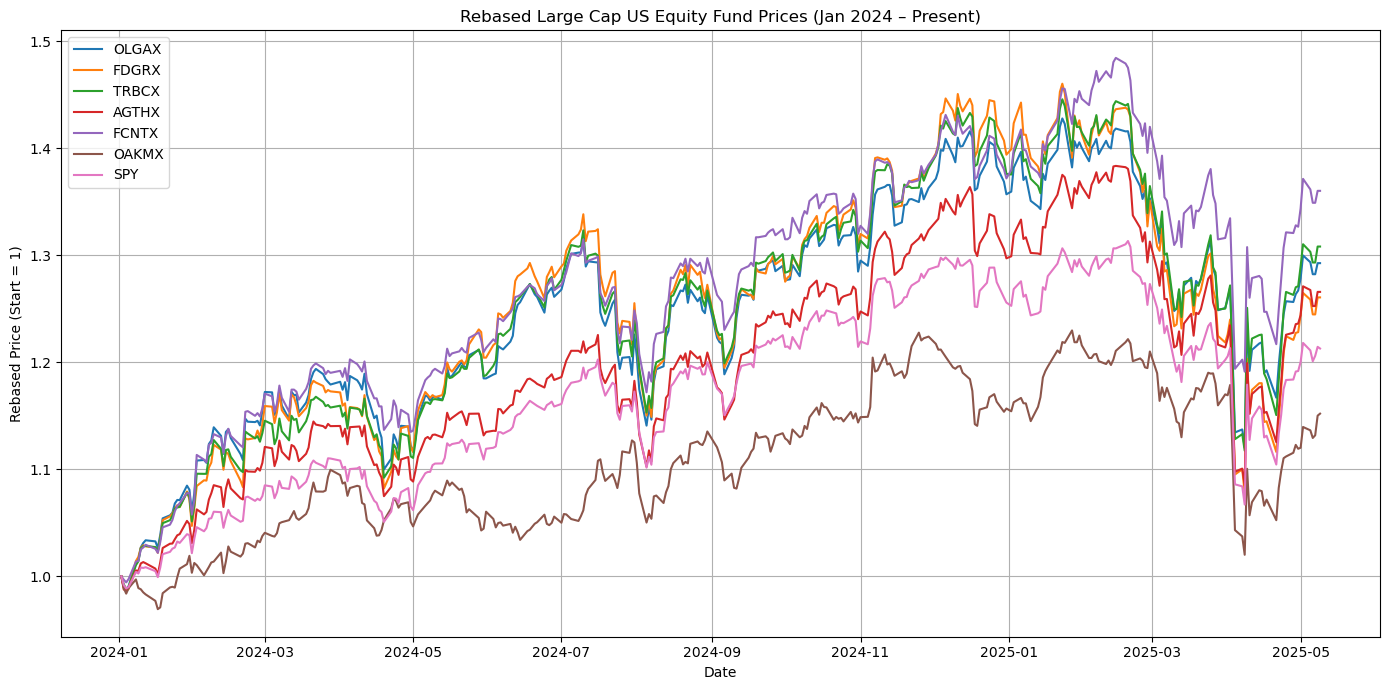

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import seaborn as sns

# Define the list of fund tickers
tickers = ['OLGAX', 'FDGRX', 'TRBCX', 'AGTHX', 'FCNTX', 'OAKMX', 'SPY']

# Define the date range
start_date = '2024-01-01'
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Initialize a DataFrame to store the close prices
fund_prices = pd.DataFrame()

# Fetch historical data for each fund
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)['Close']
    if not data.empty:
        fund_prices[ticker] = data

# Rebase prices to 1 at the start date
fund_prices_rebased = fund_prices / fund_prices.iloc[0]

# Calculate maximum drawdown for each fund
def max_drawdown(series):
    cumulative_max = series.cummax()
    drawdown = (series - cumulative_max) / cumulative_max
    return drawdown.min()

max_drawdowns = fund_prices_rebased.apply(max_drawdown)

# Plot rebased prices
plt.figure(figsize=(14, 7))
for ticker in fund_prices_rebased.columns:
    plt.plot(fund_prices_rebased.index, fund_prices_rebased[ticker], label=ticker)

plt.title('Rebased Large Cap US Equity Fund Prices (Jan 2024 – Present)')
plt.xlabel('Date')
plt.ylabel('Rebased Price (Start = 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




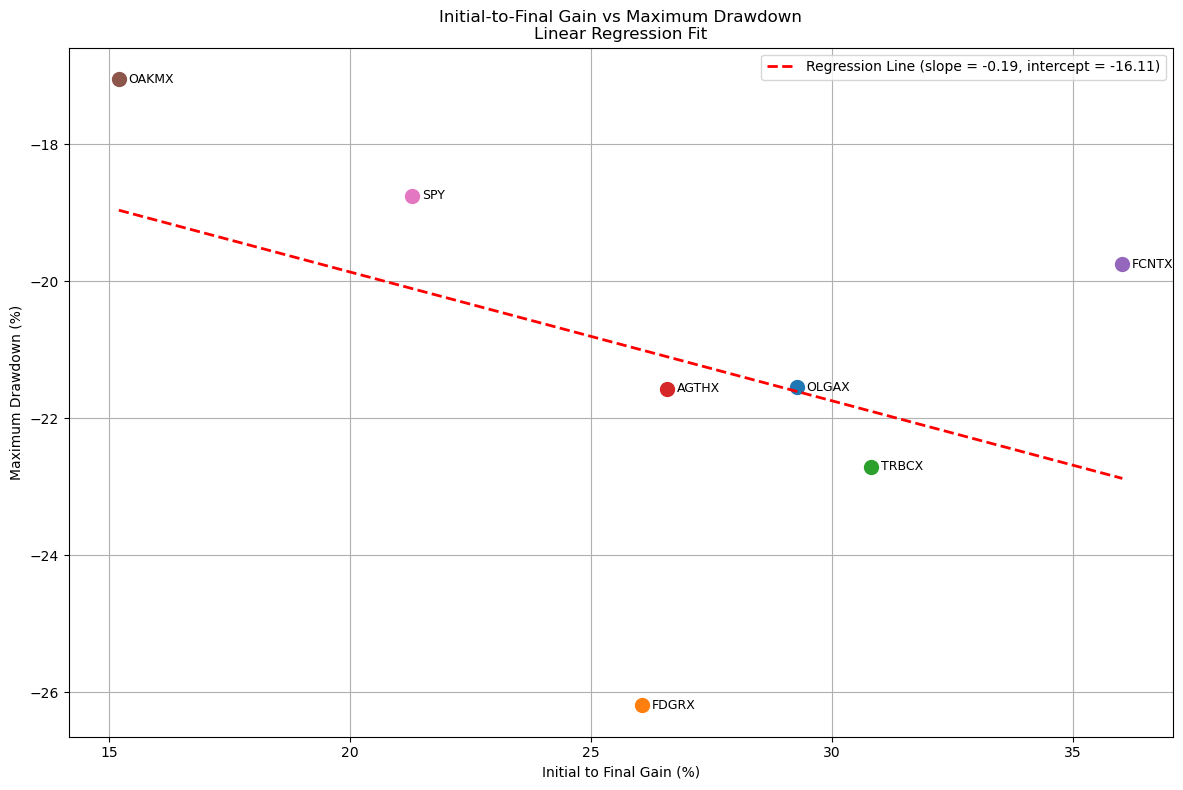

Regression Slope: -0.19
Regression Intercept: -16.11
R-squared: 0.18


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate initial prices
initial_prices = fund_prices.iloc[0]

# Maximum drawdown calculation (already rebased to 1)
def max_drawdown(series):
    cumulative_max = series.cummax()
    drawdown = (series - cumulative_max) / cumulative_max
    return drawdown.min()

max_drawdowns = fund_prices_rebased.apply(max_drawdown) * 100

# Percentage gain from initial price (rebased at 1) to final price
final_prices = fund_prices_rebased.iloc[-1]
initial_to_final_gain = (final_prices - 1) * 100

# Combine into DataFrame for analysis
analysis_df = pd.DataFrame({
    'Max Drawdown (%)': max_drawdowns,
    'Initial to Final Gain (%)': initial_to_final_gain
})

# Perform linear regression using scipy's linregress
x = analysis_df['Initial to Final Gain (%)']
y = analysis_df['Max Drawdown (%)']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Define regression line function
def regression_line(x):
    return slope * x + intercept

# Plot each fund and label directly
plt.figure(figsize=(12, 8))

for fund in analysis_df.index:
    x_val = analysis_df.loc[fund, 'Initial to Final Gain (%)']
    y_val = analysis_df.loc[fund, 'Max Drawdown (%)']
    plt.scatter(x_val, y_val, s=100)
    plt.text(x_val + 0.2, y_val, fund, fontsize=9, ha='left', va='center')

# Generate regression line
x_vals = np.array([x.min(), x.max()])
y_vals = regression_line(x_vals)

# Plot regression line
plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2,
         label=f'Regression Line (slope = {slope:.2f}, intercept = {intercept:.2f})')

# Final plot adjustments
plt.title('Initial-to-Final Gain vs Maximum Drawdown\nLinear Regression Fit')
plt.xlabel('Initial to Final Gain (%)')
plt.ylabel('Maximum Drawdown (%)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Display regression details
print(f"Regression Slope: {slope:.2f}")
print(f"Regression Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")


In [27]:
eunl = yf.Ticker('FCNTX')
data = eunl.funds_data
data.top_holdings

,Name,Holding Percent
Symbol,,
META,Meta Platforms Inc Class A,0.162974
BRK.A,Berkshire Hathaway Inc Class A,0.103356
NVDA,NVIDIA Corp,0.070696
AMZN,Amazon.com Inc,0.061639
MSFT,Microsoft Corp,0.046149
AAPL,Apple Inc,0.030299
LLY,Eli Lilly and Co,0.026094
NFLX,Netflix Inc,0.024924
GOOGL,Alphabet Inc Class A,0.020448
